Zmierz się z problemem identyfikacji rodzaju szkła. W tym celu wykorzystaj jeden ze zbiorów danych
UCI - GLASS. Zadania powinny być wykonane z pomocą Pythona i/lub WEKI. Punktacja:
1. eksploracja danych – przedstaw podstawowe dane statystyczne i uwagi dotyczące cech i etykiet
zbioru danych. (10 punktów)
2. przygotowanie danych – podziel dane na zestaw uczący i walidacyjny (alternatywnie użyj walidacji krzyżowej), zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)
Bonus – usuń 5% wartości cech i przygotuj dane stosując metody radzenia sobie z brakującymi
danymi. (5 punktów)
3. klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)
4. ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki. (20
punktów)
4
Do zadania przygotuj raport zawierający krótki opis wszystkich wykonywanych kroków oraz rezultatów zadania (najlepiej zebranych tabeli) wraz z interpretacją. W raporcie wskaż wykorzystane
materiały źródłowe oraz krótko opisz biblioteki wykorzystane przy implementacji. Raport wyślij prowadzącemu przynajmniej na 24 godziny przed oddaniem listy.


In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data = pd.read_csv(data_url, names=column_names)


print(glass_data.head(20))

    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  14

opisz dane

In [6]:
print(glass_data.describe())

               Id          RI          Na          Mg          Al          Si   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

pokaz type

In [7]:
print(glass_data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


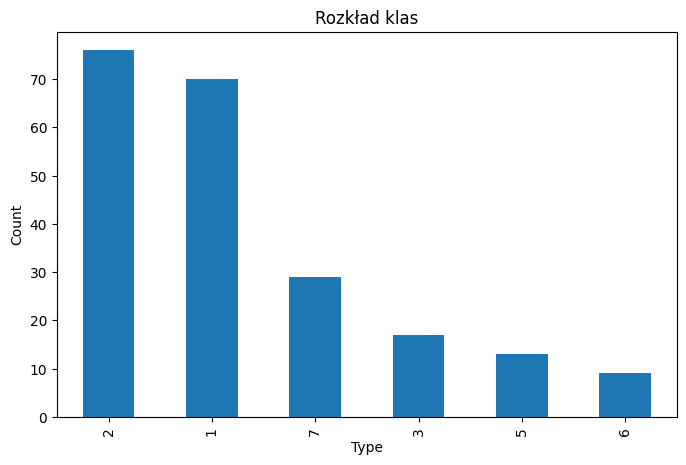

In [8]:
plt.figure(figsize=(8, 5))
glass_data['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Rozkład klas')
plt.show()

# X = glass_data.drop('Type', axis=1)
# y = glass_data['Type']



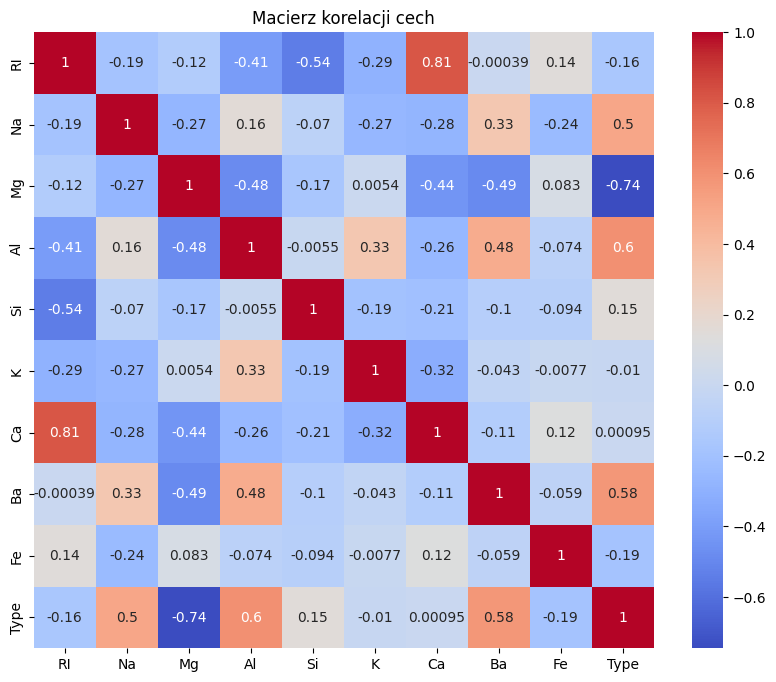

In [10]:
import seaborn as sns
# how to pip install seaborn
# https://stackoverflow.com/questions/21516872/python-3-4-how-to-install-seaborn
# https://seaborn.pydata.org/installing.html
correlation_matrix = glass_data.drop('Id', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()